## Step 0: Load Data From Kaggle Competition using the API

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "xxx" # username from the json file
os.environ['KAGGLE_KEY'] = "xxxxxxx" # key from the json file

In [2]:
!kaggle competitions download -c nn22-weather-analysis-using-image-recognition

 99%|███████████████████████████████████████▍| 578M/586M [00:07<00:00, 59.2MB/s]
100%|████████████████████████████████████████| 586M/586M [00:07<00:00, 85.0MB/s]


In [3]:
# Unzipping data
from zipfile import ZipFile
file_name = "./nn22-weather-analysis-using-image-recognition.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done unzipping')

done unzipping


## Step 1: Explore Data

In [4]:
import warnings
warnings.filterwarnings('ignore')

class_labels = ['rainbow', 'rain', 'hail', 'lightning', 'fogsmog', 'snow', 'glaze', 'rime', 'frost', 'sandstorm', 'dew']

# Displaying Train Content
data_dir_list = os.listdir('./Dataset/Train')
print("Train Directory Content: ", data_dir_list)

# Displaying Test files
path, dirs, files = next(os.walk("./Dataset/Test"))
file_count = len(files)
print("Test Directory # of files: ", file_count)

Train Directory Content:  ['lightning', 'rime', 'dew', 'frost', 'rain', 'snow', 'rainbow', 'glaze', 'hail', 'fogsmog', 'sandstorm']
Test Directory # of files:  1300


## Step 2: Train-Valid Split

### Step 2.1: Establishing Working Directories

In [5]:
# making base directory for train-valid splitting
base_dir = './Dataset/weather-data'
os.mkdir(base_dir)

In [6]:
# creating two folders (train and valid)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

valid_dir = os.path.join(base_dir, 'valid')
os.mkdir(valid_dir)

# creating eleven directories inside 'train' directory 
# ('rainbow', 'rain', 'hail', 'lightning', 'fogsmog', 'snow', 'glaze', 'rime', 'frost', 'sandstorm', 'dew')
#0
train_rainbow_dir = os.path.join(train_dir, 'rainbow')
os.mkdir(train_rainbow_dir)
#1
train_rain_dir = os.path.join(train_dir, 'rain')
os.mkdir(train_rain_dir)
#2
train_hail_dir = os.path.join(train_dir, 'hail')
os.mkdir(train_hail_dir)
#3
train_lightning_dir = os.path.join(train_dir, 'lightning')
os.mkdir(train_lightning_dir)
#4
train_fogsmog_dir = os.path.join(train_dir, 'fogsmog')
os.mkdir(train_fogsmog_dir)
#5
train_snow_dir = os.path.join(train_dir, 'snow')
os.mkdir(train_snow_dir)
#6
train_glaze_dir = os.path.join(train_dir, 'glaze')
os.mkdir(train_glaze_dir)
#7
train_rime_dir = os.path.join(train_dir, 'rime')
os.mkdir(train_rime_dir)
#8
train_frost_dir = os.path.join(train_dir, 'frost')
os.mkdir(train_frost_dir)
#9
train_sandstorm_dir = os.path.join(train_dir, 'sandstorm')
os.mkdir(train_sandstorm_dir)
#10
train_dew_dir = os.path.join(train_dir, 'dew')
os.mkdir(train_dew_dir)

# creating eleven directories inside 'valid' directory 
# ('rainbow', 'rain', 'hail', 'lightning', 'fogsmog', 'snow', 'glaze', 'rime', 'frost', 'sandstorm', 'dew')
#0
valid_rainbow_dir = os.path.join(valid_dir, 'rainbow')
os.mkdir(valid_rainbow_dir)
#1
valid_rain_dir = os.path.join(valid_dir, 'rain')
os.mkdir(valid_rain_dir)
#2
valid_hail_dir = os.path.join(valid_dir, 'hail')
os.mkdir(valid_hail_dir)
#3
valid_lightning_dir = os.path.join(valid_dir, 'lightning')
os.mkdir(valid_lightning_dir)
#4
valid_fogsmog_dir = os.path.join(valid_dir, 'fogsmog')
os.mkdir(valid_fogsmog_dir)
#5
valid_snow_dir = os.path.join(valid_dir, 'snow')
os.mkdir(valid_snow_dir)
#6
valid_glaze_dir = os.path.join(valid_dir, 'glaze')
os.mkdir(valid_glaze_dir)
#7
valid_rime_dir = os.path.join(valid_dir, 'rime')
os.mkdir(valid_rime_dir)
#8
valid_frost_dir = os.path.join(valid_dir, 'frost')
os.mkdir(valid_frost_dir)
#9
valid_sandstorm_dir = os.path.join(valid_dir, 'sandstorm')
os.mkdir(valid_sandstorm_dir)
#10
valid_dew_dir = os.path.join(valid_dir, 'dew')
os.mkdir(valid_dew_dir)

In [7]:
import random
from shutil import copyfile

def train_valid_split(src_dir, train_dir, valid_dir, split_size):
    files = []
    for filename in os.listdir(src_dir):
        file = os.path.join(src_dir, filename)
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + "is ignored as it cannot be fetched!!")

    # shuffling train data and splitting into train and valid sets
    train_size = int(len(files) * split_size)
    valid_size = int(len(files) - train_size)
    shuffled_set = random.sample(files, len(files))
    train_set = shuffled_set[0:train_size]
    valid_set = shuffled_set[train_size:]
    
    # copying train set files from source to destination 
    for filename in train_set:
        curr_file = os.path.join(src_dir, filename)
        move_dest = os.path.join(train_dir, filename)
        copyfile(curr_file, move_dest)
    
    # copying valid set files from source to destination 
    for filename in valid_set:
        curr_file = os.path.join(src_dir, filename)
        move_dest = os.path.join(valid_dir, filename)
        copyfile(curr_file, move_dest)

In [8]:
import os

TRAIN_SRC_DIR = './Dataset/Train'
TRAIN_DIR = './Dataset/weather-data/train/'
VALID_DIR = './Dataset/weather-data/valid/'

#0
DEW_SOURCE_DIR = os.path.join(TRAIN_SRC_DIR, 'dew')
DEW_TRAIN_DIR = os.path.join(TRAIN_DIR, 'dew')
DEW_VALID_DIR = os.path.join(VALID_DIR, 'dew')

#1
FOGSMOG_SOURCE_DIR = os.path.join(TRAIN_SRC_DIR, 'fogsmog')
FOGSMOG_TRAIN_DIR = os.path.join(TRAIN_DIR, 'fogsmog')
FOGSMOG_VALID_DIR = os.path.join(VALID_DIR, 'fogsmog')

#2
FROST_SOURCE_DIR = os.path.join(TRAIN_SRC_DIR, 'frost')
FROST_TRAIN_DIR = os.path.join(TRAIN_DIR, 'frost')
FROST_VALID_DIR = os.path.join(VALID_DIR, 'frost')

#3
GLAZE_SOURCE_DIR = os.path.join(TRAIN_SRC_DIR, 'glaze')
GLAZE_TRAIN_DIR = os.path.join(TRAIN_DIR, 'glaze')
GLAZE_VALID_DIR = os.path.join(VALID_DIR, 'glaze')

#4
HAIL_SOURCE_DIR = os.path.join(TRAIN_SRC_DIR, 'hail')
HAIL_TRAIN_DIR = os.path.join(TRAIN_DIR, 'hail')
HAIL_VALID_DIR = os.path.join(VALID_DIR, 'hail')

#5
LIGHTNING_SOURCE_DIR = os.path.join(TRAIN_SRC_DIR, 'lightning')
LIGHTNING_TRAIN_DIR = os.path.join(TRAIN_DIR, 'lightning')
LIGHTNING_VALID_DIR = os.path.join(VALID_DIR, 'lightning')

#6
RAIN_SOURCE_DIR = os.path.join(TRAIN_SRC_DIR, 'rain')
RAIN_TRAIN_DIR = os.path.join(TRAIN_DIR, 'rain')
RAIN_VALID_DIR = os.path.join(VALID_DIR, 'rain')

#7
RAINBOW_SOURCE_DIR = os.path.join(TRAIN_SRC_DIR, 'rainbow')
RAINBOW_TRAIN_DIR = os.path.join(TRAIN_DIR, 'rainbow')
RAINBOW_VALID_DIR = os.path.join(VALID_DIR, 'rainbow')

#8
RIME_SOURCE_DIR = os.path.join(TRAIN_SRC_DIR, 'rime')
RIME_TRAIN_DIR = os.path.join(TRAIN_DIR, 'rime')
RIME_VALID_DIR = os.path.join(VALID_DIR, 'rime')

#9
SANDSTORM_SOURCE_DIR = os.path.join(TRAIN_SRC_DIR, 'sandstorm')
SANDSTORM_TRAIN_DIR = os.path.join(TRAIN_DIR, 'sandstorm')
SANDSTORM_VALID_DIR = os.path.join(VALID_DIR, 'sandstorm')

#10
SNOW_SOURCE_DIR = os.path.join(TRAIN_SRC_DIR, 'snow')
SNOW_TRAIN_DIR = os.path.join(TRAIN_DIR, 'snow')
SNOW_VALID_DIR = os.path.join(VALID_DIR, 'snow')

In [9]:
split_portion = .90

# splitting each class into train-validation sets
train_valid_split(DEW_SOURCE_DIR, DEW_TRAIN_DIR, DEW_VALID_DIR, split_portion)
train_valid_split(FOGSMOG_SOURCE_DIR, FOGSMOG_TRAIN_DIR, FOGSMOG_VALID_DIR, split_portion)
train_valid_split(FROST_SOURCE_DIR, FROST_TRAIN_DIR, FROST_VALID_DIR, split_portion)
train_valid_split(GLAZE_SOURCE_DIR, GLAZE_TRAIN_DIR, GLAZE_VALID_DIR, split_portion)
train_valid_split(HAIL_SOURCE_DIR, HAIL_TRAIN_DIR, HAIL_VALID_DIR, split_portion)
train_valid_split(LIGHTNING_SOURCE_DIR, LIGHTNING_TRAIN_DIR, LIGHTNING_VALID_DIR, split_portion)
train_valid_split(RAIN_SOURCE_DIR, RAIN_TRAIN_DIR, RAIN_VALID_DIR, split_portion)
train_valid_split(RAINBOW_SOURCE_DIR, RAINBOW_TRAIN_DIR, RAINBOW_VALID_DIR, split_portion)
train_valid_split(RIME_SOURCE_DIR, RIME_TRAIN_DIR, RIME_VALID_DIR, split_portion)
train_valid_split(SANDSTORM_SOURCE_DIR, SANDSTORM_TRAIN_DIR, SANDSTORM_VALID_DIR, split_portion)
train_valid_split(SNOW_SOURCE_DIR, SNOW_TRAIN_DIR, SNOW_VALID_DIR, split_portion)

## Step 2.2: Train-Valid Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

class_labels = ['rainbow', 'rain', 'hail', 'lightning', 'fogsmog', 'snow', 'glaze', 'rime', 'frost', 'sandstorm', 'dew']
def plot_classes_distributions(dir_path, plot_title):
    class_imgs_num = {}
    for lbl in class_labels:
        class_imgs_num[lbl] = len(os.listdir(dir_path+lbl+'/'))

    plt.figure(figsize=(9, 6))
    plt.bar(range(len(class_imgs_num)), list(class_imgs_num.values()), align='center')
    plt.xticks(range(len(class_imgs_num)), list(class_imgs_num.keys()))
    plt.title(plot_title)
    plt.show()

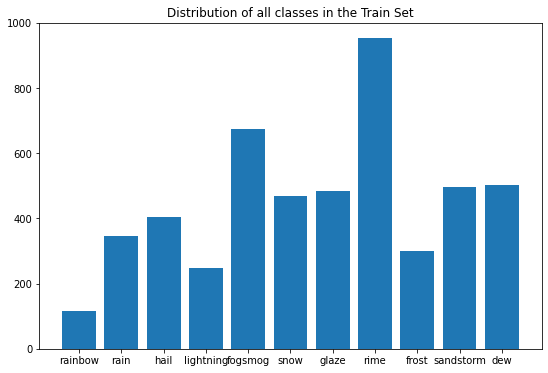

In [11]:
plot_classes_distributions(TRAIN_DIR, 'Distribution of all classes in the Train Set')

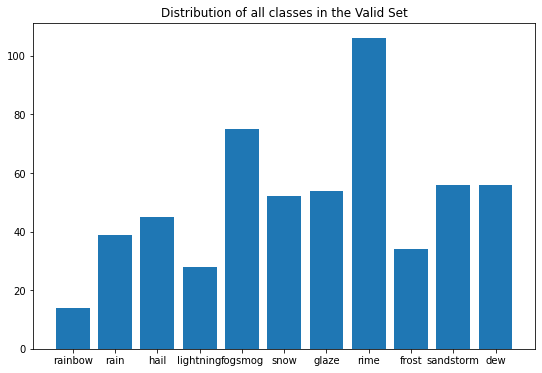

In [12]:
plot_classes_distributions(VALID_DIR, 'Distribution of all classes in the Valid Set')

In [13]:
for lbl in class_labels:
    print('# of Train {} images are: '.format(lbl) + str(len(os.listdir(TRAIN_DIR + lbl +'/'))))
    
print('========================================')

for lbl in class_labels:
    print('# of Valid {} images are: '.format(lbl) + str(len(os.listdir(VALID_DIR + lbl +'/'))))

# of Train rainbow images are: 117
# of Train rain images are: 346
# of Train hail images are: 405
# of Train lightning images are: 248
# of Train fogsmog images are: 675
# of Train snow images are: 468
# of Train glaze images are: 484
# of Train rime images are: 953
# of Train frost images are: 300
# of Train sandstorm images are: 495
# of Train dew images are: 501
# of Valid rainbow images are: 14
# of Valid rain images are: 39
# of Valid hail images are: 45
# of Valid lightning images are: 28
# of Valid fogsmog images are: 75
# of Valid snow images are: 52
# of Valid glaze images are: 54
# of Valid rime images are: 106
# of Valid frost images are: 34
# of Valid sandstorm images are: 56
# of Valid dew images are: 56


## Step 3: Deep Learning with Data Augmentation

### Step 3.1: Image Data Generator

In [14]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
BATCH_SIZE = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 4992 images belonging to 11 classes.


In [15]:
valid_datagen = ImageDataGenerator(rescale = 1/255.0)

valid_generator = valid_datagen.flow_from_directory(VALID_DIR,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='categorical',
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 559 images belonging to 11 classes.


### Step 3.2: Building The Mode

In [16]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
warnings.filterwarnings('ignore')

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)), 
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), 
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(11, activation='softmax')
], name='CNN')

model.summary()

2022-05-28 01:05:08.241741: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0       

2022-05-28 01:05:08.365467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-28 01:05:08.366298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-28 01:05:08.367516: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-28 01:05:08.367813: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

### Step 3.3: Model Optimizer

In [17]:
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers import SGD

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=1e-4), metrics=["accuracy"])
# model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=1e-4, momentum=0.9), metrics=["accuracy"])

### Step 3.4: Model Checkpoint & EarlyStopping Callback

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# autosave best Model
checkpoint_path = './training/vgg16_best_model.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)
early = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

### Step 3.5: Model Training

In [19]:
history = model.fit_generator(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=valid_generator,
                              callbacks = [checkpoint, early])

2022-05-28 01:05:12.953542: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-05-28 01:05:14.936727: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


312/312 [==============================] - 88s 256ms/step - loss: 1.9543 - accuracy: 0.3207 - val_loss: 1.4521 - val_accuracy: 0.4848
Epoch 2/50
312/312 [==============================] - 80s 255ms/step - loss: 1.5316 - accuracy: 0.4776 - val_loss: 1.3742 - val_accuracy: 0.5009
Epoch 3/50
312/312 [==============================] - 80s 257ms/step - loss: 1.4035 - accuracy: 0.5120 - val_loss: 1.3588 - val_accuracy: 0.5116
Epoch 4/50
312/312 [==============================] - 79s 254ms/step - loss: 1.2989 - accuracy: 0.5485 - val_loss: 1.4058 - val_accuracy: 0.5152
Epoch 5/50
312/312 [==============================] - 81s 259ms/step - loss: 1.2590 - accuracy: 0.5563 - val_loss: 1.0995 - val_accuracy: 0.6029
Epoch 6/50
312/312 [==============================] - 80s 256ms/step - loss: 1.2057 - accuracy: 0.5833 - val_loss: 1.0453 - val_accuracy: 0.6100
Epoch 7/50
312/312 [==============================] - 80s 258ms/step - loss: 1.1774 - accuracy: 0.5903 - val_loss: 1.2454 - val_accuracy: 0.5

## Step 4: Model Evaluation

In [20]:
evl = model.evaluate_generator(valid_generator)
print("Loss: {:0.4f}".format(evl[0]), "Accuracy: {:0.4f}".format(evl[1]))

Loss: 0.7620 Accuracy: 0.7317


### Step 4.1: Performance Visusalization

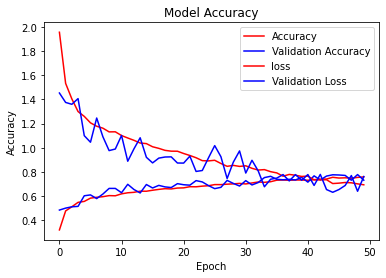

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(len(acc))

import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

## Step 5: Model Prediction

### Step 5.1: Reading Test Images into a Dataframe

In [22]:
import pandas as pd
TEST_DIR = './Dataset/Test'
img_path = os.listdir(TEST_DIR)
test_df = pd.DataFrame({'image_name': img_path})
n_test_samples = test_df.shape[0]
print("Number of Loaded Test Data Samples: ", n_test_samples)

Number of Loaded Test Data Samples:  1300


### Step 5.2: Test Image Data Generator

In [23]:
test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_generator = test_datagen.flow_from_dataframe(test_df, 
                                                  directory=TEST_DIR,
                                                  x_col='image_name',
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  y_col=None,
                                                  batch_size=1,
                                                  class_mode=None,
                                                  shuffle=False)

Found 1300 validated image filenames.


In [24]:
import numpy as np

pred_array = model.predict(test_generator, steps=np.ceil(n_test_samples/1.0))
predictions = np.argmax(pred_array, axis=1)
test_df['label'] = predictions
test_df.head()

,image_name,label
0,test_764.jpg,10
1,test_892.jpg,5
2,test_621.jpg,2
3,test_1277.jpg,8
4,test_1156.jpg,5


## Step 6: Model Saving

In [25]:
model.save('cnn-model.h5')

## Step 7: Submission File Creation

In [26]:
print("[START]: File Creation...")
test_df.to_csv(r'./submission_3.csv', index=False)
print("[END]: File Creation!")

[START]: File Creation...
[END]: File Creation!
